<a href="https://colab.research.google.com/github/TokyoYoshida/GoogleColab/blob/master/playground_dqn_keiba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# 必要ならば以下のようにディレクトリ移動する
 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/'My Drive'/'★個人専用ファイル'/'開発用・個人サービス開発'/'GoogleColab'/

/content/drive/My Drive/★個人専用ファイル/開発用・個人サービス開発/GoogleColab


In [0]:
%ls


data/
duel_dqn_Pendulum-v0_weights.h5f
h5f/
playground_dqn_keiba
playground_dqn_keiba_try_layer_add_depth
playground_dqn_keiba_try_long_term_reward
playground_dqn_keiba_try_simple
playground_dqn_keiba_try_simple2
playground_dqn_keiba_try_simple_x_1
playground_dqn_study.ipynb
playground_dqn_study_my_try.ipynb
playground_dqn_study_my_try_modify_reward
playground.ipynb


In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
# 競馬データの作成

In [0]:
ldat = pd.read_pickle("./data/keiba_dat_res_20190611_sorted.pkl")

In [0]:
ldat

,rank,frame_num,horse_num,name,sex,age,amount,jockey,time,diff_arrival,odds,popularity,weight,diff_weight,trainer,race_num,grade,ground,direction,unknown,distance,weather,condition,start_time,year,month,day,prev_rank,prev_frame_num,prev_horse_num,prev_name,prev_sex,prev_age,prev_amount,prev_jockey,prev_time,prev_diff_arrival,prev_odds,prev_popularity,prev_weight,prev_diff_weight,prev_trainer,prev_race_num,prev_grade,prev_ground,prev_direction,prev_unknown,prev_distance,prev_weather,prev_condition,prev_start_time,prev_year,prev_month,prev_day,winner,return,prev_time_float,start_time_float,prev_start_time_float
0,1.0,6,6,0,0,2,54.0,0,1:31.6,0,3.2,1.0,474.0,0.0,0,1,9,0,0,-,1500.0,0,0,10:40,2006,8,12,3.0,6.0,6.0,0.0,0.0,2.0,51.0,75.0,1:12.2,1.0,9.6,3.0,474.0,-2.0,0.0,1.0,9.0,0.0,0.0,-,1200.0,1.0,0.0,10:40,2006.0,7.0,29.0,True,3.2,1561165932,1561200000,1561200000
1,2.0,7,8,1,1,2,54.0,1,1:31.6,1,6.4,4.0,448.0,-8.0,1,1,9,0,0,-,1500.0,0,0,10:40,2006,8,12,3.0,1.0,1.0,1.0,1.0,2.0,54.0,1.0,1:57.7,18.0,26.9,7.0,456.0,0.0,1.0,4.0,9.0,0.0,0.0,-,1800.0,1.0,1.0,12:30,2006.0,7.0,23.0,False,0.0,1561168662,1561200000,1561206600
2,3.0,7,7,2,1,2,54.0,2,1:31.9,2,4.3,3.0,476.0,0.0,2,1,9,0,0,-,1500.0,0,0,10:40,2006,8,12,4.0,1.0,1.0,2.0,1.0,2.0,54.0,2.0,1:12.5,1.0,6.7,3.0,476.0,-8.0,2.0,1.0,9.0,0.0,0.0,-,1200.0,1.0,0.0,10:40,2006.0,7.0,30.0,False,0.0,1561165950,1561200000,1561200000
3,4.0,2,2,3,1,2,51.0,3,1:32.1,3,33.1,7.0,484.0,0.0,3,1,9,0,0,-,1500.0,0,0,10:40,2006,8,12,12.0,1.0,1.0,3.0,1.0,2.0,51.0,3.0,1:57.3,7.0,11.9,5.0,484.0,0.0,3.0,5.0,9.0,0.0,0.0,-,1800.0,2.0,2.0,12:20,2006.0,7.0,2.0,False,0.0,1561168638,1561200000,1561206000
4,5.0,5,5,4,1,2,54.0,4,1:32.1,1,3.9,2.0,518.0,6.0,4,1,9,0,0,-,1500.0,0,0,10:40,2006,8,12,3.0,2.0,2.0,4.0,1.0,2.0,54.0,15.0,1:12.5,9.0,6.6,2.0,512.0,-2.0,4.0,1.0,9.0,0.0,0.0,-,1200.0,1.0,0.0,10:40,2006.0,7.0,30.0,False,0.0,1561165950,1561200000,1561200000
5,6.0,3,3,5,1,2,54.0,5,1:32.2,4,8.2,5.0,466.0,2.0,5,1,9,0,0,-,1500.0,0,0,10:40,2006,8,12,6.0,3.0,3.0,5.0,1.0,2.0,54.0,73.0,1:14.6,9.0,42.4,8.0,464.0,0.0,5.0,4.0,9.0,0.0,0.0,-,1200.0,1.0,0.0,12:30,2006.0,7.0,30.0,False,0.0,1561166076,1561200000,1561206600
6,7.0,8,10,6,1,2,53.0,6,1:33.0,5,77.4,10.0,444.0,8.0,6,1,9,0,0,-,1500.0,0,0,10:40,2006,8,12,7.0,8.0,8.0,6.0,1.0,2.0,53.0,6.0,1:13.4,1.0,50.6,7.0,436.0,0.0,6.0,4.0,9.0,0.0,0.0,-,1200.0,2.0,0.0,12:30,2006.0,7.0,22.0,False,0.0,1561166004,1561200000,1561206600
7,8.0,8,9,7,1,2,54.0,7,1:33.2,3,53.4,9.0,442.0,0.0,7,1,9,0,0,-,1500.0,0,0,10:40,2006,8,12,12.0,5.0,7.0,7.0,1.0,2.0,54.0,7.0,1:56.5,3.0,123.4,11.0,442.0,0.0,7.0,5.0,9.0,0.0,0.0,-,1800.0,1.0,0.0,11:50,2006.0,7.0,9.0,False,0.0,1561168590,1561200000,1561204200
8,9.0,1,1,8,1,2,54.0,8,1:33.4,6,43.4,8.0,424.0,0.0,8,1,9,0,0,-,1500.0,0,0,10:40,2006,8,12,7.0,8.0,9.0,8.0,1.0,2.0,54.0,8.0,1:15.0,7.0,21.6,5.0,424.0,0.0,8.0,4.0,9.0,0.0,0.0,-,1200.0,1.0,0.0,12:30,2006.0,7.0,30.0,False,0.0,1561166100,1561200000,1561206600
9,10.0,4,4,9,1,2,54.0,9,1:33.8,7,10.5,6.0,500.0,-2.0,9,1,9,0,0,-,1500.0,0,0,10:40,2006,8,12,4.0,8.0,11.0,9.0,1.0,2.0,54.0,9.0,1:01.5,7.0,4.3,3.0,502.0,8.0,9.0,1.0,9.0,1.0,0.0,-,1000.0,0.0,0.0,10:40,2006.0,8.0,5.0,False,0.0,1561165290,1561200000,1561200000


In [0]:
sdat = ldat.sample(frac=1).reset_index(drop=True)

In [0]:
x = sdat[['frame_num', 'horse_num', 'name', 'sex', 'age', 'amount',
       'jockey', 'odds', 'popularity', 'weight',
       'diff_weight', 'trainer', 'race_num', 'grade', 'ground', 'direction',
        'distance', 'weather', 'condition', 'start_time_float', 'year',
       'month', 'day', 'prev_rank', 'prev_frame_num', 'prev_horse_num',
       'prev_name', 'prev_sex', 'prev_age', 'prev_amount', 'prev_jockey',
       'prev_time_float', 'prev_diff_arrival', 'prev_odds', 'prev_popularity',
       'prev_weight', 'prev_diff_weight', 'prev_trainer', 'prev_race_num',
       'prev_grade', 'prev_ground', 'prev_direction',
       'prev_distance', 'prev_weather', 'prev_condition', 'prev_start_time_float',
       'prev_year', 'prev_month', 'prev_day']].dropna(0)

In [0]:
y = sdat[["return"]].dropna(0)

In [0]:
# 競馬データの作成 終わり

In [0]:
# 学習、テストデータの作成

In [0]:
trainlen = int(len(x)/2)

In [0]:
trainx = x.head(trainlen)
trainy = y.head(trainlen)

In [0]:
testx = x.tail(len(x)-trainlen)
testy = y.tail(len(x)-trainlen)

In [0]:
# 学習、テストデータの作成　終わり

In [0]:
!pip install -q keras

In [0]:
import keras

Using TensorFlow backend.


In [0]:
!pip install -q keras-rl

     |████████████████████████████████| 40kB 3.8MB/s 


In [0]:
from pprint import pprint

In [0]:
trainx.min()

frame_num                1.000000e+00
horse_num                1.000000e+00
name                     0.000000e+00
sex                      0.000000e+00
age                      2.000000e+00
amount                   4.800000e+01
jockey                   0.000000e+00
odds                     1.000000e+00
popularity               1.000000e+00
weight                   3.300000e+02
diff_weight             -5.000000e+01
trainer                  0.000000e+00
race_num                 1.000000e+00
grade                    1.000000e+00
ground                   0.000000e+00
direction                0.000000e+00
distance                 1.000000e+03
weather                  0.000000e+00
condition                0.000000e+00
start_time_float         1.561197e+09
year                     2.006000e+03
month                    1.000000e+00
day                      1.000000e+00
prev_rank                1.000000e+00
prev_frame_num           1.000000e+00
prev_horse_num           1.000000e+00
prev_name   

In [0]:
np.array(trainx.iloc[1])

array([ 1.00000000e+00,  1.00000000e+00,  3.30590000e+04,  1.00000000e+00,
        6.00000000e+00,  5.70000000e+01,  3.56000000e+02,  6.85000000e+01,
        1.00000000e+01,  4.42000000e+02,  5.00000000e+00,  4.53000000e+02,
        1.20000000e+01,  9.00000000e+00,  0.00000000e+00,  2.00000000e+00,
        2.00000000e+03,  0.00000000e+00,  2.00000000e+00,  1.56121926e+09,
        2.01600000e+03,  1.00000000e+00,  3.10000000e+01,  1.30000000e+01,
        4.00000000e+00,  7.00000000e+00,  3.30590000e+04,  1.00000000e+00,
        3.00000000e+00,  5.60000000e+01,  2.98000000e+02,  1.56116731e+09,
        1.00000000e+00,  9.48000000e+01,  1.40000000e+01,  4.40000000e+02,
       -2.00000000e+00,  4.53000000e+02,  6.00000000e+00,  9.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.60000000e+03,  0.00000000e+00,
        0.00000000e+00,  1.56120840e+09,  2.01300000e+03,  9.00000000e+00,
        1.70000000e+01])

In [0]:
float(trainy.iloc[0])

0.0

In [0]:
import numpy as np

import gym
from gym import spaces
from gym.utils import seeding


class HotterColder(gym.Env):
    """Hotter Colder
    The goal of hotter colder is to guess closer to a randomly selected number

    After each step the agent receives an observation of:
    0 - No guess yet submitted (only after reset)
    1 - Guess is lower than the target
    2 - Guess is equal to the target
    3 - Guess is higher than the target

    The rewards is calculated as:
    (min(action, self.number) + self.range) / (max(action, self.number) + self.range)

    Ideally an agent will be able to recognise the 'scent' of a higher reward and
    increase the rate in which is guesses in that direction until the reward reaches
    its maximum
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y

        self.range = 10  # +/- value the randomly select number can be between
        self.bounds = 20  # Action space bounds

        self.number = 0
        self.guess_count = 0
        self.guess_max = 200
        self.race_num = 0

        self.action_space = gym.spaces.Discrete(2)
        min = np.array(self.x.min())
        low = np.concatenate([[-1*self.guess_max], min])
        max = np.array(self.x.max())        
        high = np.concatenate([[1*self.guess_max*1000], max])
        self.observation_space = gym.spaces.Box(low=low, high=high) 
        
        self.seed()
        self.reset()

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def step(self, action):
        self.done =  self._is_done(action)

        reward = 0
        if self.done == False:
          if action == 1:
            self.amount += (-1 + float(self.y.iloc[self.race_num]))
        else:
          reward = self.amount #- 0.01
#          print("")

#         self.amount += reward

        self.guess_count += 1
        self.race_num += 1

        if self.race_num >= len(self.x):
          self.race_num = 0

#        print(action, end="")
#        pprint((self.x.iloc[self.race_num], reward, self.done, {"guesses": self.guess_count}))
        return np.concatenate([[self.amount],np.array(self.x.iloc[self.race_num])]), reward, self.done, {"guesses": self.guess_count}

    def reset(self):
        self.done = False
        self.amount = 0
        self.guess_count = 0
        
#        pprint(np.concatenate([[self.amount],np.array(self.x.iloc[self.race_num])]))
        return np.concatenate([[self.amount],np.array(self.x.iloc[self.race_num])])
      
    def _is_done(self, action):
        if self.guess_count >= self.guess_max - 1:
#           print("Over")
          return True
        return False         
      
      

In [0]:
env = HotterColder(trainx, trainy)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [0]:
#x =  spaces.Box(low=np.array([-200]), high=np.array([200]),                                       dtype=np.float32)

In [0]:
nb_actions = env.action_space.n


In [0]:
nb_actions

2

In [0]:
# env.action_space.contains(np.array([-2000]))


In [0]:
# import gym

# # GymのPendulum環境を作成
# env = gym.make("Pendulum-v0")

# # 取りうる”打ち手”のアクション数と値の定義
# nb_actions = 2
# ACT_ID_TO_VALUE = {0: [-1], 1: [+1]}

In [0]:
from rl.core import Processor


class PendulumProcessor(Processor):

    # Duel-DQNの出力と、Gym環境の入力の違いを吸収
    def process_action(self, action):
        return action

    # Gym環境の報酬の出力と、Duel-DQNの報酬の入力との違いを吸収
    def process_reward(self, reward):
      return reward
#         if reward > -0.2:
#             return 1
#         elif reward > -1.0:
#             return 0
#         else:
#             return 0
    def process_observation(self, observation):
      return observation

processor = PendulumProcessor()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten


model = Sequential()
# model.add(Flatten())
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Activation("relu"))
model.add(Dense(16))
model.add(Activation("relu"))
model.add(Dense(nb_actions, activation="linear"))

W0825 06:22:38.703811 139816996812672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 06:22:38.758732 139816996812672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 06:22:38.797949 139816996812672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
(1,) + env.observation_space.shape

(1, 50)

In [0]:
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory


# Duel-DQNアルゴリズム関連の幾つかの設定
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()

# Duel-DQNのAgentクラスオブジェクトの準備 （上記processorやmodelを元に）
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
               enable_dueling_network=True, dueling_type="avg", target_model_update=1e-2, policy=policy,processor=processor)
dqn.compile(Adam(lr=1e-3), metrics=["mae"])
print(dqn.model.summary())




W0825 06:22:38.963789 139816996812672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0825 06:22:38.965156 139816996812672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0825 06:22:39.283695 139816996812672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_input (InputLayer) (None, 1, 50)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                816       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
_________________________________________________________________
lambda_1 (Lambda)            (None, 2)                 0         
Total para

In [0]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=69)

In [0]:
pd.DataFrame({"dummy":1},index=[0]).to_csv("h5f/save_start.csv")

In [0]:
# 定義課題環境に対して、アルゴリズムの学習を実行 （必要に応じて適切なCallbackも定義、設定可能）
# 上記Processorクラスの適切な設定によって、Agent-環境間の入出力を通して設計課題に対しての学習が進行
dqn.fit(env, nb_steps=50000, visualize=False, callbacks=[early_stop], verbose=2)
# 学習後のモデルの重みの出力
dqn.save_weights("h5f/my_dqn_weights_try_modify_reward.h5f", overwrite=True)



Training for 50000 steps ...


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


   201/50000: episode: 1, duration: 0.929s, episode steps: 201, steps per second: 216, episode reward: -116.500, mean reward: -0.580 [-116.500, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672969.003 [-116.500, 1561223400.000], loss: 295595655549154.375000, mean_absolute_error: 16478982.589474, mean_q: 333664474.105263


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


   402/50000: episode: 2, duration: 0.844s, episode steps: 201, steps per second: 238, episode reward: -140.100, mean reward: -0.697 [-140.100, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672943.890 [-140.100, 1561223400.000], loss: 179410833506304.000000, mean_absolute_error: 16356584.000000, mean_q: 325268896.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


   603/50000: episode: 3, duration: 0.811s, episode steps: 201, steps per second: 248, episode reward: -116.600, mean reward: -0.580 [-116.600, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672945.675 [-116.600, 1561223400.000], loss: 288533822570496.000000, mean_absolute_error: 18173186.000000, mean_q: 315204160.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


   804/50000: episode: 4, duration: 0.776s, episode steps: 201, steps per second: 259, episode reward: -124.700, mean reward: -0.620 [-124.700, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672896.596 [-124.700, 1561223400.000], loss: 244424961425408.000000, mean_absolute_error: 19019468.000000, mean_q: 305878912.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  1005/50000: episode: 5, duration: 0.768s, episode steps: 201, steps per second: 262, episode reward: -126.200, mean reward: -0.628 [-126.200, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672942.661 [-126.200, 1561222200.000], loss: 262942712922112.000000, mean_absolute_error: 19811506.000000, mean_q: 296432288.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  1206/50000: episode: 6, duration: 0.758s, episode steps: 201, steps per second: 265, episode reward: -17.900, mean reward: -0.089 [-17.900, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672968.843 [-82.400, 1561223400.000], loss: 197216090193920.000000, mean_absolute_error: 20304014.000000, mean_q: 287596864.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  1407/50000: episode: 7, duration: 0.762s, episode steps: 201, steps per second: 264, episode reward: -54.000, mean reward: -0.269 [-54.000, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672883.575 [-62.000, 1561222200.000], loss: 191807434522624.000000, mean_absolute_error: 20991034.000000, mean_q: 279375392.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  1608/50000: episode: 8, duration: 0.773s, episode steps: 201, steps per second: 260, episode reward: -37.300, mean reward: -0.186 [-37.300, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672980.097 [-42.300, 1561221000.000], loss: 172990662705152.000000, mean_absolute_error: 21589852.000000, mean_q: 271258368.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  1809/50000: episode: 9, duration: 0.816s, episode steps: 201, steps per second: 246, episode reward: -148.700, mean reward: -0.740 [-148.700, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672802.148 [-148.700, 1561222200.000], loss: 121221307957248.000000, mean_absolute_error: 22089464.000000, mean_q: 264153600.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  2010/50000: episode: 10, duration: 0.783s, episode steps: 201, steps per second: 257, episode reward: -93.000, mean reward: -0.463 [-93.000, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672943.759 [-96.500, 1561223400.000], loss: 175227803795456.000000, mean_absolute_error: 23059074.000000, mean_q: 256212320.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  2211/50000: episode: 11, duration: 0.806s, episode steps: 201, steps per second: 249, episode reward: 81.400, mean reward: 0.405 [0.000, 81.400], mean action: 1.000 [1.000, 1.000], mean observation: 93672908.919 [-83.700, 1561223400.000], loss: 202578440749056.000000, mean_absolute_error: 24237248.000000, mean_q: 248009424.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  2412/50000: episode: 12, duration: 0.776s, episode steps: 201, steps per second: 259, episode reward: -62.000, mean reward: -0.308 [-62.000, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672900.364 [-117.700, 1561223400.000], loss: 149736602468352.000000, mean_absolute_error: 24227502.000000, mean_q: 240530304.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  2613/50000: episode: 13, duration: 0.811s, episode steps: 201, steps per second: 248, episode reward: -121.900, mean reward: -0.606 [-121.900, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672952.955 [-139.200, 1561223400.000], loss: 90144090619904.000000, mean_absolute_error: 24400972.000000, mean_q: 234242576.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  2814/50000: episode: 14, duration: 0.789s, episode steps: 201, steps per second: 255, episode reward: -96.300, mean reward: -0.479 [-96.300, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672948.396 [-96.300, 1561223400.000], loss: 102116697833472.000000, mean_absolute_error: 25137376.000000, mean_q: 227816960.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  3015/50000: episode: 15, duration: 0.782s, episode steps: 201, steps per second: 257, episode reward: -1.200, mean reward: -0.006 [-1.200, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672863.716 [-28.000, 1561223400.000], loss: 132253753540608.000000, mean_absolute_error: 26321252.000000, mean_q: 221126048.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  3216/50000: episode: 16, duration: 0.815s, episode steps: 201, steps per second: 247, episode reward: 0.300, mean reward: 0.001 [0.000, 0.300], mean action: 1.000 [1.000, 1.000], mean observation: 93672925.499 [-47.600, 1561223700.000], loss: 136161083260928.000000, mean_absolute_error: 27097578.000000, mean_q: 214377472.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  3417/50000: episode: 17, duration: 0.801s, episode steps: 201, steps per second: 251, episode reward: -36.900, mean reward: -0.184 [-36.900, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672937.151 [-59.800, 1561223400.000], loss: 92756076658688.000000, mean_absolute_error: 27067782.000000, mean_q: 208109136.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  3618/50000: episode: 18, duration: 0.815s, episode steps: 201, steps per second: 247, episode reward: -164.100, mean reward: -0.816 [-164.100, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672863.146 [-164.100, 1561223700.000], loss: 117463295459328.000000, mean_absolute_error: 27786266.000000, mean_q: 201765984.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  3819/50000: episode: 19, duration: 0.777s, episode steps: 201, steps per second: 259, episode reward: -137.500, mean reward: -0.684 [-137.500, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672916.410 [-137.500, 1561223400.000], loss: 113366752296960.000000, mean_absolute_error: 28706496.000000, mean_q: 195289216.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  4020/50000: episode: 20, duration: 0.770s, episode steps: 201, steps per second: 261, episode reward: -87.200, mean reward: -0.434 [-87.200, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672884.797 [-99.500, 1561223400.000], loss: 75340319817728.000000, mean_absolute_error: 28796704.000000, mean_q: 190151568.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  4221/50000: episode: 21, duration: 0.788s, episode steps: 201, steps per second: 255, episode reward: -36.700, mean reward: -0.183 [-36.700, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672911.682 [-70.200, 1561222200.000], loss: 100564226539520.000000, mean_absolute_error: 29571166.000000, mean_q: 184064656.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  4422/50000: episode: 22, duration: 0.834s, episode steps: 201, steps per second: 241, episode reward: 43.400, mean reward: 0.216 [0.000, 43.400], mean action: 1.000 [1.000, 1.000], mean observation: 93672960.409 [-22.000, 1561223400.000], loss: 59374387068928.000000, mean_absolute_error: 29376142.000000, mean_q: 179289056.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  4623/50000: episode: 23, duration: 0.775s, episode steps: 201, steps per second: 259, episode reward: -106.800, mean reward: -0.531 [-106.800, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672905.410 [-106.800, 1561223400.000], loss: 56999043661824.000000, mean_absolute_error: 29885476.000000, mean_q: 174298736.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  4824/50000: episode: 24, duration: 0.787s, episode steps: 201, steps per second: 255, episode reward: -152.300, mean reward: -0.758 [-152.300, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672894.002 [-152.300, 1561222200.000], loss: 68405101068288.000000, mean_absolute_error: 30631506.000000, mean_q: 169243936.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  5025/50000: episode: 25, duration: 0.778s, episode steps: 201, steps per second: 258, episode reward: -48.600, mean reward: -0.242 [-48.600, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672934.534 [-48.600, 1561222200.000], loss: 59816256995328.000000, mean_absolute_error: 30891894.000000, mean_q: 164479248.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  5226/50000: episode: 26, duration: 0.828s, episode steps: 201, steps per second: 243, episode reward: -85.600, mean reward: -0.426 [-85.600, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672921.699 [-112.900, 1561223400.000], loss: 62577191157760.000000, mean_absolute_error: 31466904.000000, mean_q: 159728000.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  5427/50000: episode: 27, duration: 0.788s, episode steps: 201, steps per second: 255, episode reward: -116.500, mean reward: -0.580 [-116.500, 0.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672830.740 [-116.500, 1561223400.000], loss: 34473869574144.000000, mean_absolute_error: 31615768.000000, mean_q: 155735504.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  5628/50000: episode: 28, duration: 0.818s, episode steps: 201, steps per second: 246, episode reward: 140.000, mean reward: 0.697 [0.000, 140.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672893.293 [-20.000, 1561223400.000], loss: 65887767887872.000000, mean_absolute_error: 32693180.000000, mean_q: 151047920.000000


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: episode_reward,nb_episode_steps,nb_steps
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


  5829/50000: episode: 29, duration: 0.804s, episode steps: 201, steps per second: 250, episode reward: 165.000, mean reward: 0.821 [0.000, 165.000], mean action: 1.000 [1.000, 1.000], mean observation: 93672927.025 [-45.800, 1561223400.000], loss: 56454975324160.000000, mean_absolute_error: 33011562.000000, mean_q: 146807072.000000
done, took 23.611 seconds


In [0]:
# 学習後のモデルの重みの出力
dqn.save_weights("h5f/my_dqn_weights_try_modify_reward.h5f", overwrite=True)



In [0]:
dqn.load_weights("h5f/my_dqn_weights_try_modify_reward.h5f")


In [0]:
import rl.callbacks
class EpisodeLogger(rl.callbacks.Callback):
    def __init__(self):
        self.observations = {}
        self.rewards = {}
        self.actions = {}

    def on_episode_begin(self, episode, logs):
        self.observations[episode] = []
        self.rewards[episode] = []
        self.actions[episode] = []

    def on_step_end(self, step, logs):
        episode = logs['episode']
        self.observations[episode].append(logs['observation'])
        self.rewards[episode].append(logs['reward'])
        self.actions[episode].append(logs['action'])

cb_ep = EpisodeLogger()

In [0]:
# 学習済モデルに対して、テストを実行 （必要に応じて適切なCallbackも定義、設定可能）
dqn.test(env, nb_episodes=20, visualize=False, callbacks=[cb_ep])

Testing for 20 episodes ...
Episode 1: reward: -166.600, steps: 201
Episode 2: reward: -26.400, steps: 201
Episode 3: reward: -96.000, steps: 201
Episode 4: reward: -109.100, steps: 201
Episode 5: reward: -112.300, steps: 201
Episode 6: reward: -122.800, steps: 201
Episode 7: reward: -151.300, steps: 201
Episode 8: reward: -100.000, steps: 201
Episode 9: reward: -166.900, steps: 201
Episode 10: reward: -83.600, steps: 201
Episode 11: reward: -77.500, steps: 201
Episode 12: reward: 23.200, steps: 201
Episode 13: reward: -73.200, steps: 201
Episode 14: reward: 65.300, steps: 201
Episode 15: reward: 94.800, steps: 201
Episode 16: reward: -52.200, steps: 201
Episode 17: reward: -93.300, steps: 201
Episode 18: reward: -46.700, steps: 201
Episode 19: reward: -106.200, steps: 201
Episode 20: reward: -41.800, steps: 201


Text(0, 0.5, 'pos')

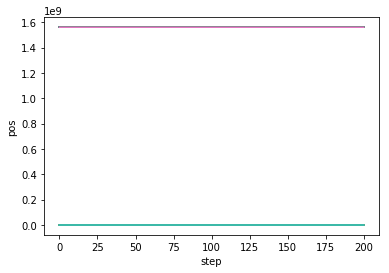

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

for obs in cb_ep.observations.values():
    plt.plot([o for o in obs])
plt.xlabel("step")
plt.ylabel("pos")

In [0]:
cb_ep.actions[0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [0]:
a  = np.array([1,2,3])
b = np.array([4,5,6])

In [0]:
np.concatenate([[1],b])

array([1, 4, 5, 6])